# DECISION TREE on auctions dataset

## Problem statement

* The file auctions.csv contains information on 1972 auctions that transacted on eBay.com during May–June 2004.
* The goal is to use these data to build a model that will classify auctions as competitive or noncompetitive.
* A competitive auction is defined as an auction with at least two bids placed on the item auctioned. * The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close).
* In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive.
* Build a classification model to predict if an auction will be competitive or not
* Identify the important variables that impact the prediction

In [158]:
#Importing standard libararies into waorkspace


import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Splitting the dataset 
from sklearn.model_selection import train_test_split

#Importing Decision classsifier
from sklearn.tree import DecisionTreeClassifier

#Importing Gridsearch for the best hyperparameters
from sklearn.model_selection import GridSearchCV,StratifiedKFold

#Importing metrics for the evaluation of classification model
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report,confusion_matrix, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


%matplotlib inline


In [159]:
#Reading the data by pandas library

data = pd.read_csv('auctions.csv')
data.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [160]:
data.shape #data having 1972 observations and 8 variables

(1972, 8)

In [161]:
data.nunique()

Category         18
currency          3
sellerRating    461
Duration          5
endDay            7
ClosePrice      827
OpenPrice       291
Competitive       2
dtype: int64

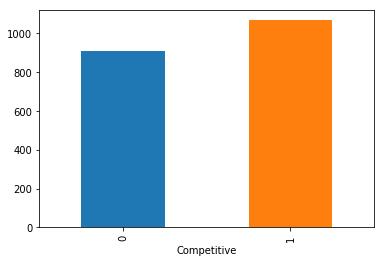

In [162]:
data.groupby(by='Competitive').size().plot(kind='bar')
plt.show()

It is balanced dataset and binary classification problem.

Data Description
-------------------------

Category:
--------------

1)There 18 unique values in the category like (Music/Movie/Game,Automotive,SportingGoods,Books,Home/Garden...etc).

Currency:
-------------

3 unique values in the currency file (i.e US,GBP,EUR)


Duration:
-------------

5 unique values in the duration column.


Endday:
-----------

There are 7 unique values in the  endday column. (Monday,Tuesday,Wednesday,Thursday,Friday,Saturday).

Open price:
----------------

Open price for the auctions

Closed price:
----------------------

Closed price for the auctions.

Competitive:
------------------

There 906 entries are not competitive and 1066 entries are not competitive.

0---Non-Competitive

1---Competitive










In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
Category        1972 non-null object
currency        1972 non-null object
sellerRating    1972 non-null int64
Duration        1972 non-null int64
endDay          1972 non-null object
ClosePrice      1972 non-null float64
OpenPrice       1972 non-null float64
Competitive     1972 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 123.3+ KB


In [164]:
data['Category']=data['Category'].astype('category')
data['currency']=data['currency'].astype('category')
data['endDay']=data['endDay'].astype('category')
data['Competitive']=data['Competitive'].astype('category')
data['sellerRating']=data['sellerRating'].astype('category')

# Exploratory Data Analysis

In [165]:
data.groupby(by=['Category','Competitive']).size().to_frame().rename(columns={0:"Count"}).sort_values(by='Count',ascending=False).head(10)

Count
Category          Competitive       
Music/Movie/Game  1              243
                  0              160
Collectibles      1              138
Toys/Hobbies      1              124
Automotive        0              115
Toys/Hobbies      0              110
Collectibles      0              101
Antique/Art/Craft 1              100
SportingGoods     1               90
Antique/Art/Craft 0               77

Top Categories are from Music/Movie/Game,Collectibles,Toys/Hobbies,Automotive etc..

# Currency VS Competitive 

In [166]:
data.groupby(by=['currency','Competitive']).size().to_frame().rename(columns={0:"Count"}).sort_values(by='Count',ascending=False).head(10)

Count
currency Competitive       
US       1              671
         0              621
EUR      1              294
         0              239
GBP      1              101
         0               46

Most competetive and Non-comptetive are from USA followed by Europe.

# EndDay-Competetive

In [167]:
data.groupby(by=['endDay','Competitive']).size().to_frame().rename(columns={0:"Count"}).head(10)

Count
endDay Competitive       
Fri    0              153
       1              134
Mon    0              179
       1              369
Sat    0              201
       1              150
Sun    0              174
       1              164
Thu    0               80
       1              122

Most Competetive auctions are happenend in Monday 

# Data Preparation

In [168]:
x = data.drop(["Competitive"], axis=1)
y = data[['Competitive']]
print(x.shape)
print(y.shape)

(1972, 7)
(1972, 1)


In [169]:
x=pd.get_dummies(x)

In [170]:
x.columns

Index(['Duration', 'ClosePrice', 'OpenPrice', 'Category_Antique/Art/Craft',
       'Category_Automotive', 'Category_Books', 'Category_Business/Industrial',
       'Category_Clothing/Accessories', 'Category_Coins/Stamps',
       'Category_Collectibles',
       ...
       'sellerRating_30594', 'sellerRating_34343', 'sellerRating_37727',
       'endDay_Fri', 'endDay_Mon', 'endDay_Sat', 'endDay_Sun', 'endDay_Thu',
       'endDay_Tue', 'endDay_Wed'],
      dtype='object', length=492)

# Splitting dataset

In [171]:
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

In [172]:
X_train.shape

(1380, 492)

In [173]:
y_train.shape

(1380, 1)

# Measure of impurity --Gini

In [174]:
model_gini=DecisionTreeClassifier()
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [175]:
preds_gini = model_gini.predict(X_test)

# Evaluation Metrics

In [176]:
y_test['Competitive'].shape

(592,)

In [177]:
y_test.groupby(by='Competitive').size()

Competitive
0    260
1    332
dtype: int64

In [178]:

mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[236  24]
 [ 37 295]]


Confusion Matrix(Description)
------------------------------------------------

Totally in the y_test dataset there 260 observations are Non-Competitive and 332 observations are Competetive.

Out of 260 records , 236 records classified correct are Non-Competitive (True Positives) and 24 records actually Non-Competitive but modelled predicted as Competitive (False negatives).


Out of 332 records , 37 records classified as Non-Competitive but actually they are Competitive (False Positives) and 295 records classified correct as Competitive.(True negatives).


In [179]:
print(accuracy_score(y_test,preds_gini))

0.8969594594594594


In [180]:
TP=236
TN=295
FP=37
FN=24

In [181]:
(TP+TN)/(TP+FP+TN+FN)

0.8969594594594594

Model giving 89 percentage accuracy.

# Model 1 -Criteria-Entropy


In [182]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [183]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [184]:
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [185]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[239  21]
 [ 35 297]]


Confusion Matrix(Description)
------------------------------------------------

Totally in the y_test dataset there 260 observations are Non-Competitive and 332 observations are Competetive.

Out of 260 records , 238 records classified correct are Non-Competitive (True Positives) and 22 records actually Non-Competitive but modelled predicted as Competitive (False negatives).


Out of 332 records , 30 records classified as Non-Competitive but actually they are Competitive (False Positives) and 302 records classified correct as Competitive.(True negatives).


# Evaluation Metrics

In [186]:
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))

0.9054054054054054
0.9920289855072464


Training accuracy of the model is 99.20 percentage almost 100 which leads to overfit.To Overfit ,We pruned the tree by giving max depth.

# Tree Visualization

In [187]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [188]:
feature_cols = x.columns

# Tree from entropy

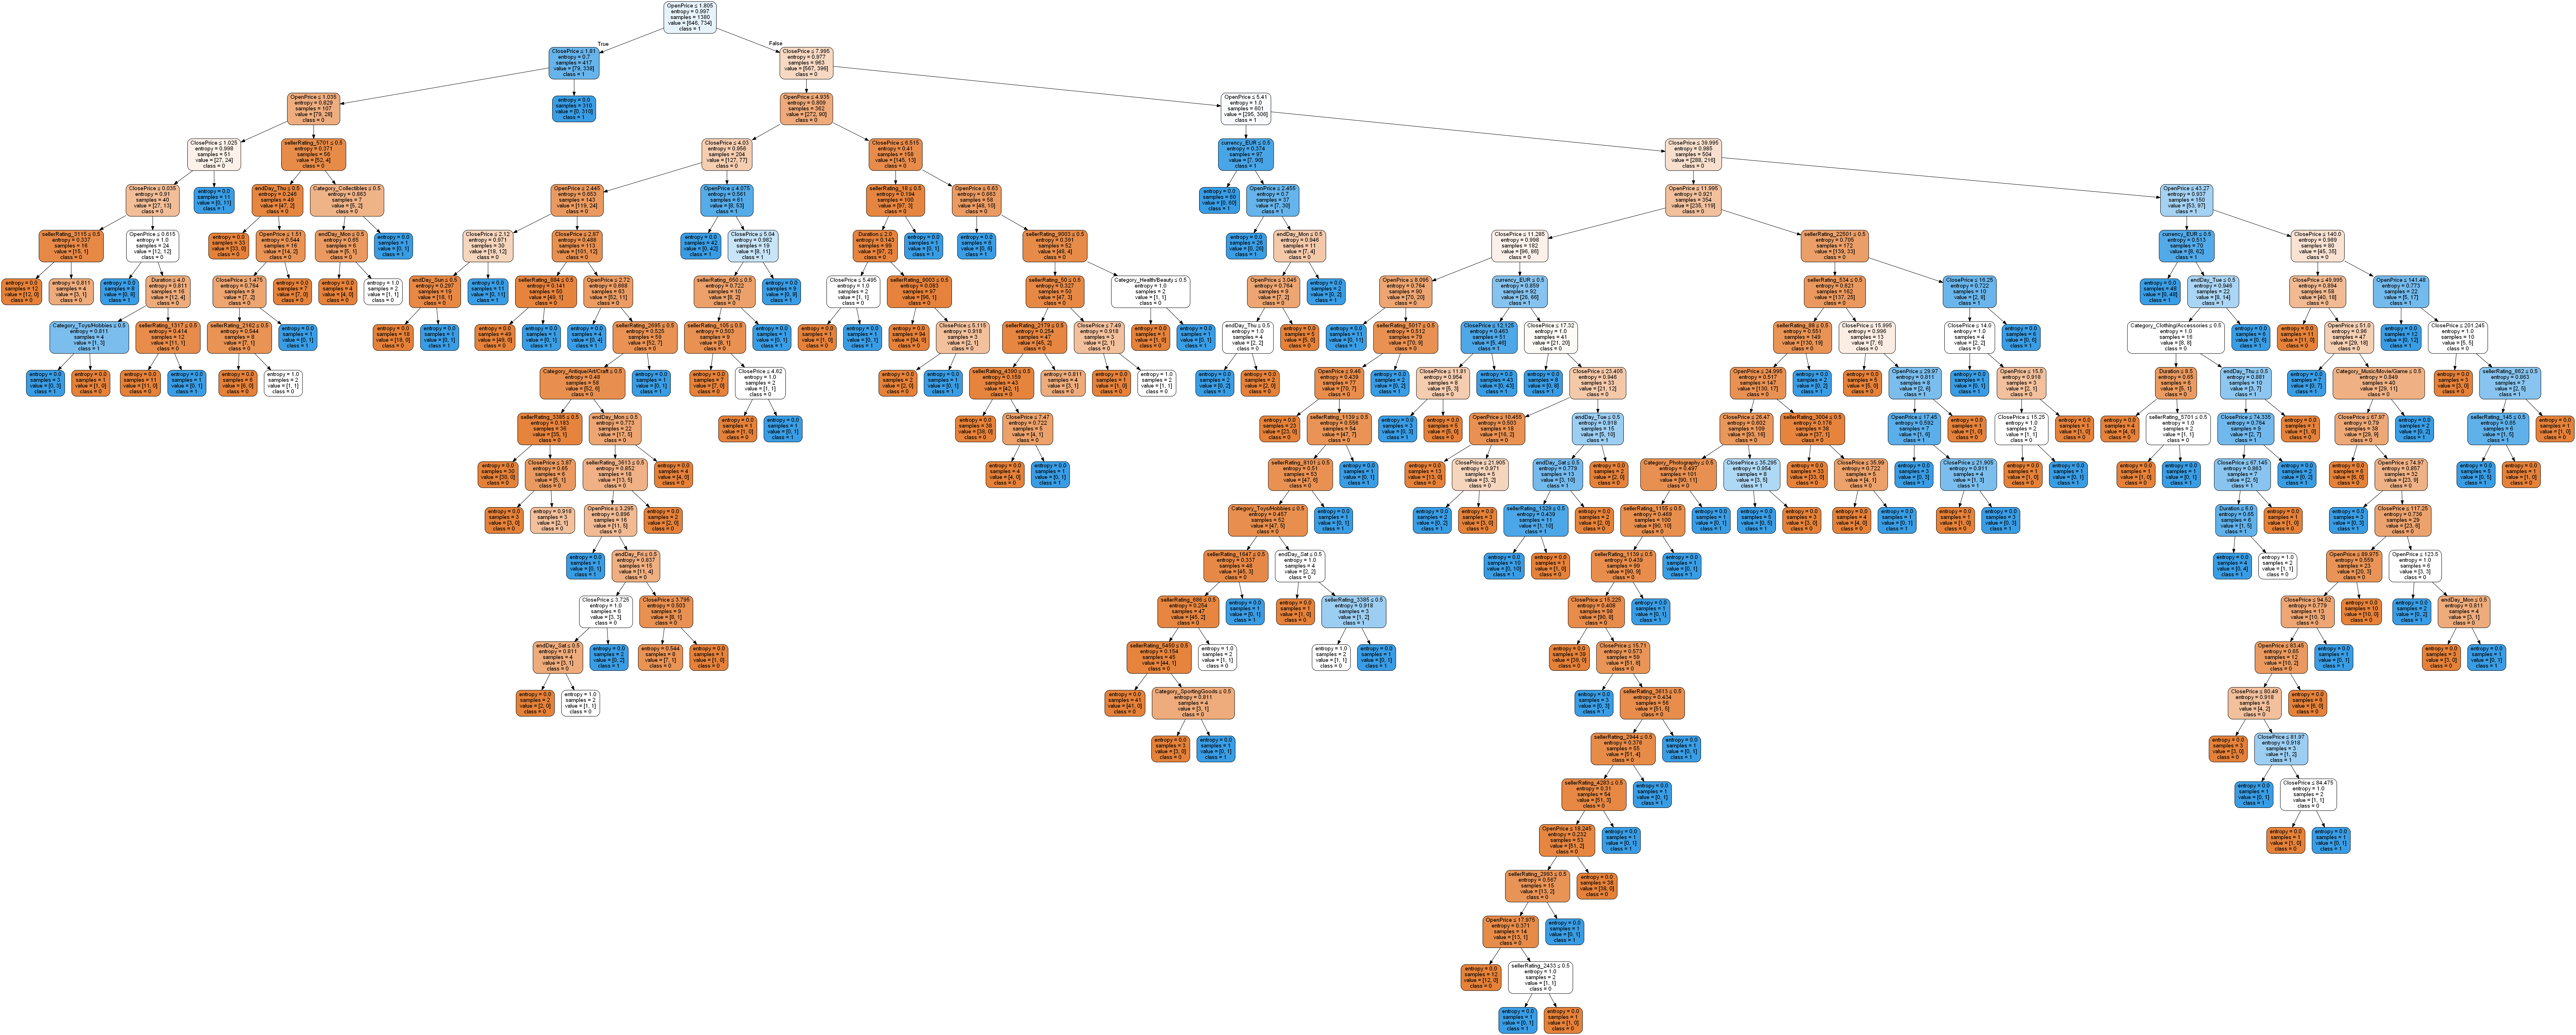

In [189]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_entropy.png')
Image(graph.create_png())

# Pruning Tree

In [190]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

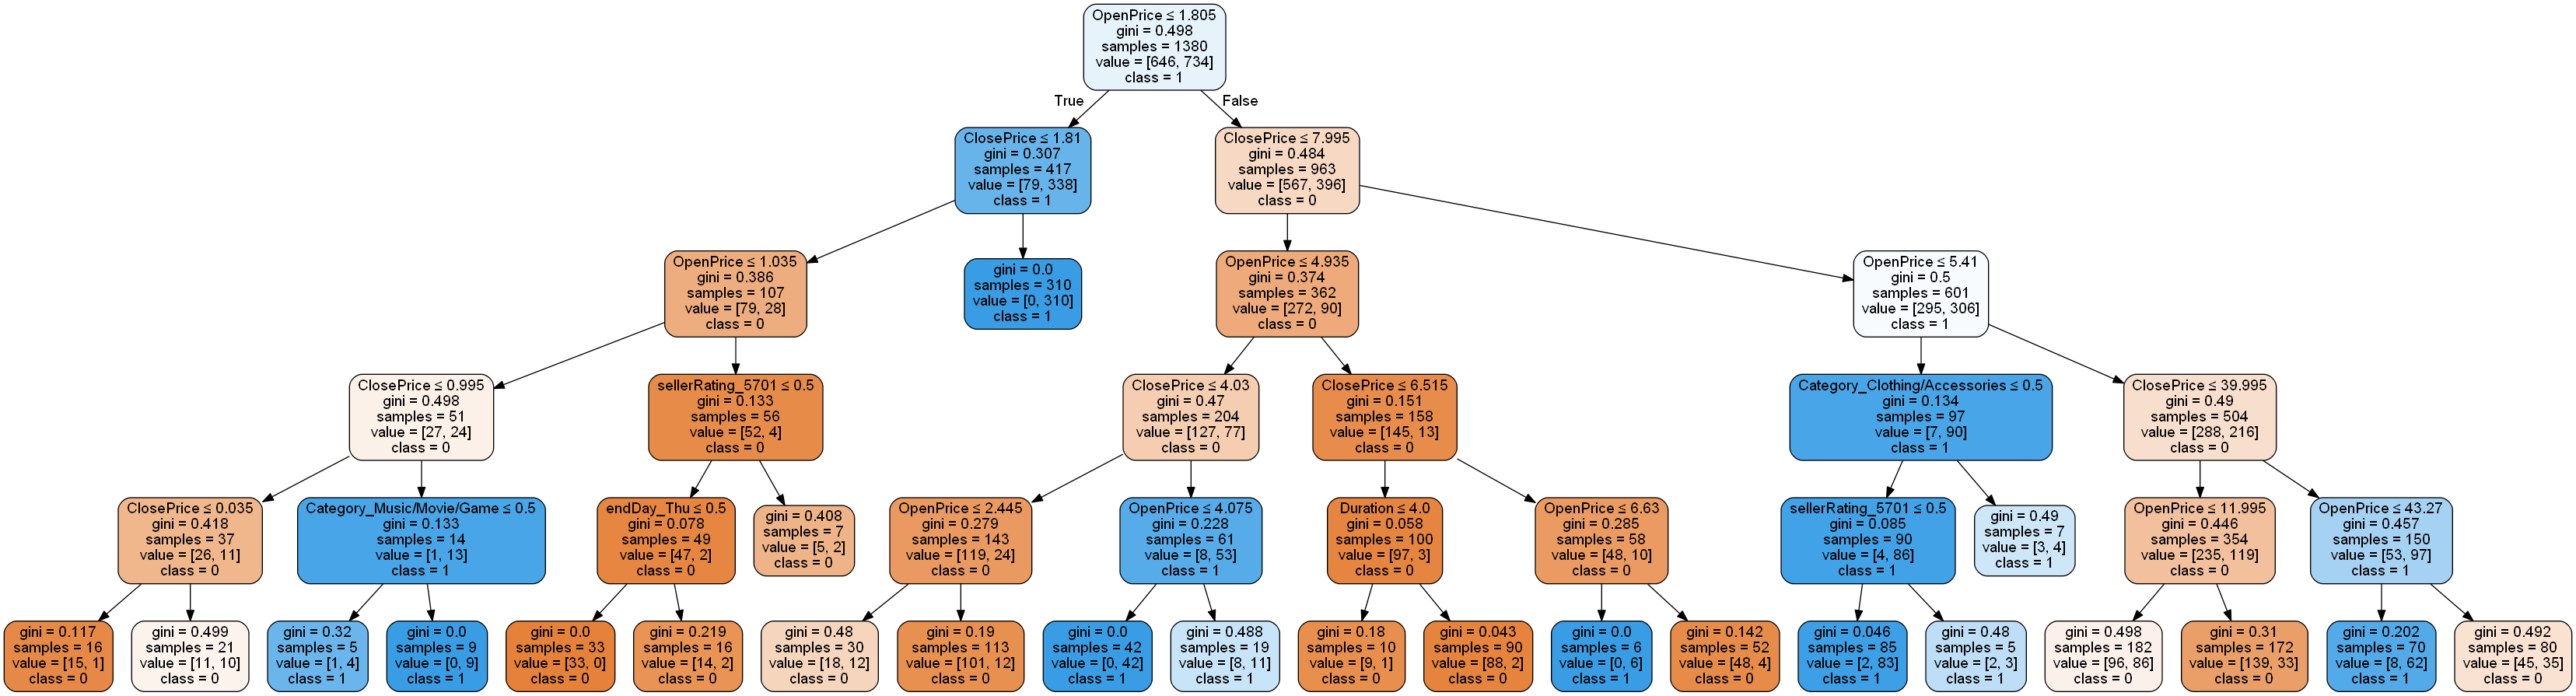

In [191]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_pruned.png')
Image(graph.create_png())

In [192]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [193]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[246  14]
 [108 224]]


In [194]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.793918918918919
0.8376811594202899


# Feature Importance

In [195]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [7.89049919e-05 1.39439567e-01 1.47980429e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.38889482e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.86335404e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.000

# Feature Importance

In [196]:
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(10)

,0
OpenPrice,0.508838
ClosePrice,0.479470
sellerRating_5701,0.005166
Category_Clothing/Accessories,0.004776
endDay_Thu,0.000839
Category_Music/Movie/Game,0.000641
Duration,0.000271
sellerRating_1135,0.000000
sellerRating_1139,0.000000
sellerRating_1329,0.000000


In [197]:
clf_pruned.predict_proba(X_test)[0:10]


array([[0.        , 1.        ],
       [0.02352941, 0.97647059],
       [0.        , 1.        ],
       [0.80813953, 0.19186047],
       [0.52747253, 0.47252747],
       [0.52747253, 0.47252747],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

# Probability for class1

In [198]:
y_pred_prob = clf_pruned.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([0.97647059, 1.        , 0.19186047, 0.47252747, 0.47252747,
       1.        , 1.        , 1.        , 1.        , 0.19186047,
       0.97647059, 0.10619469, 0.4375    , 0.07692308, 1.        ,
       1.        , 0.19186047, 0.4375    , 1.        ])

Text(0, 0.5, 'Frequency')

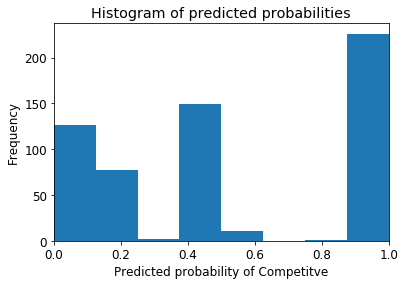

In [213]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Competitve')
plt.ylabel('Frequency')

In [214]:
from sklearn import metrics

In [215]:
## Changing the cut off value for prediction
pred_proba_df = pd.DataFrame(clf_pruned.predict_proba(X_test))
threshold_list = [0.01,0.02,0.03,0.04,0.05,0.11,0.12,0.13,0.14,0.15,0.17,0.19,0.2,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.6,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.01 ******
Our testing accuracy is 0.58
[[ 11 249]
 [  0 332]]

******** For i = 0.02 ******
Our testing accuracy is 0.58
[[ 11 249]
 [  0 332]]

******** For i = 0.03 ******
Our testing accuracy is 0.63
[[ 42 218]
 [  2 330]]

******** For i = 0.04 ******
Our testing accuracy is 0.63
[[ 42 218]
 [  2 330]]

******** For i = 0.05 ******
Our testing accuracy is 0.63
[[ 42 218]
 [  2 330]]

******** For i = 0.11 ******
Our testing accuracy is 0.71
[[107 153]
 [ 19 313]]

******** For i = 0.12 ******
Our testing accuracy is 0.71
[[107 153]
 [ 19 313]]

******** For i = 0.13 ******
Our testing accuracy is 0.72
[[114 146]
 [ 21 311]]

******** For i = 0.14 ******
Our testing accuracy is 0.72
[[114 146]
 [ 21 311]]

******** For i = 0.15 ******
Our testing accuracy is 0.72
[[114 146]
 [ 21 311]]

******** For i = 0.17 ******
Our testing accuracy is 0.72
[[114 146]
 [ 21 311]]

******** For i = 0.19 ******
Our testing accuracy is 0.72
[[114 146]
 [ 21 311]]

******** For i 

C:\Users\Naga Ranjith\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Naga Ranjith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Naga Ranjith\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Naga Ranjith\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


[[246  14]
 [108 224]]

******** For i = 0.52 ******
Our testing accuracy is 0.79
[[246  14]
 [108 224]]

******** For i = 0.53 ******
Our testing accuracy is 0.79
[[246  14]
 [108 224]]

******** For i = 0.54 ******
Our testing accuracy is 0.79
[[246  14]
 [108 224]]

******** For i = 0.55 ******
Our testing accuracy is 0.79
[[246  14]
 [108 224]]

******** For i = 0.56 ******
Our testing accuracy is 0.79
[[246  14]
 [108 224]]

******** For i = 0.57 ******
Our testing accuracy is 0.79
[[246  14]
 [108 224]]

******** For i = 0.6 ******
Our testing accuracy is 0.79
[[250  10]
 [115 217]]

******** For i = 0.91 ******
Our testing accuracy is 0.75
[[257   3]
 [145 187]]

******** For i = 0.92 ******
Our testing accuracy is 0.75
[[257   3]
 [145 187]]

******** For i = 0.93 ******
Our testing accuracy is 0.75
[[257   3]
 [145 187]]

******** For i = 0.94 ******
Our testing accuracy is 0.75
[[257   3]
 [145 187]]

******** For i = 0.95 ******
Our testing accuracy is 0.75
[[257   3]
 [145 

In [202]:
# %matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

In [203]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [216]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [217]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 8}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       242        18
pos        60       272


In [206]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth
2,0.938,0.736,0.833,5
0,0.931,0.582,0.754,3
4,0.924,0.812,0.864,7
5,0.921,0.831,0.872,8
3,0.921,0.808,0.860,6
1,0.869,0.786,0.823,4


In [218]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)

In [219]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [220]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    
   

In [221]:
precision_recall_threshold(p, r, thresholds, 0.17)

     pred_neg  pred_pos
neg       209        51
pos        44       288


In [222]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

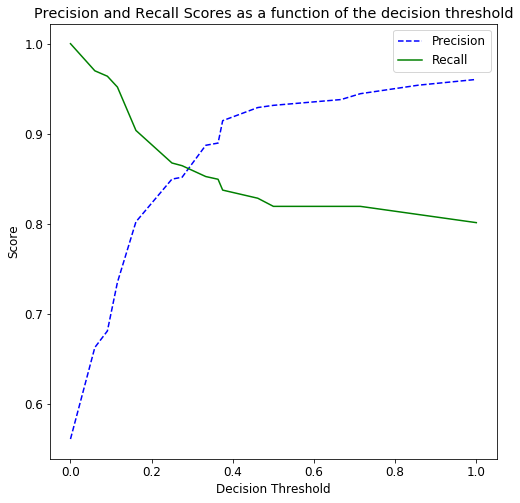

In [223]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)